In [1]:
#EJERCICIO 1:

In [2]:
import os
os.environ['USE_PYGEOS'] = '0'

import geopandas as gpd

from  fiona import listlayers

#mapa de peru
PeruMapas = 'https://github.com/thiagoDali/nuevoPais/raw/main/mapasPeru/PeruMapas.gpkg'

#layers in maps
listlayers(PeruMapas)

['ciudades',
 'areasUrbanasNacionales',
 'areasUrbanasPrivadas',
 'zonaAmortiguamiento']

In [3]:
ciudades               = gpd.read_file(PeruMapas, layer='ciudades')
areasUrbanasNacionales = gpd.read_file(PeruMapas, layer='areasUrbanasNacionales')
areasUrbanasPrivadas   = gpd.read_file(PeruMapas, layer='areasUrbanasPrivadas')
zonaAmortiguamiento    = gpd.read_file(PeruMapas, layer='zonaAmortiguamiento')

In [4]:
ciudades.crs.to_epsg() == areasUrbanasNacionales.crs.to_epsg() == areasUrbanasPrivadas.crs.to_epsg() == zonaAmortiguamiento.crs.to_epsg()

True

In [5]:
# país elegido: 
peru = gpd.read_file(os.path.join("mapas","DEPARTAMENTOS","DEPARTAMENTOS.shp"))

Text(0.5, 1.0, 'Mapa del Perú')

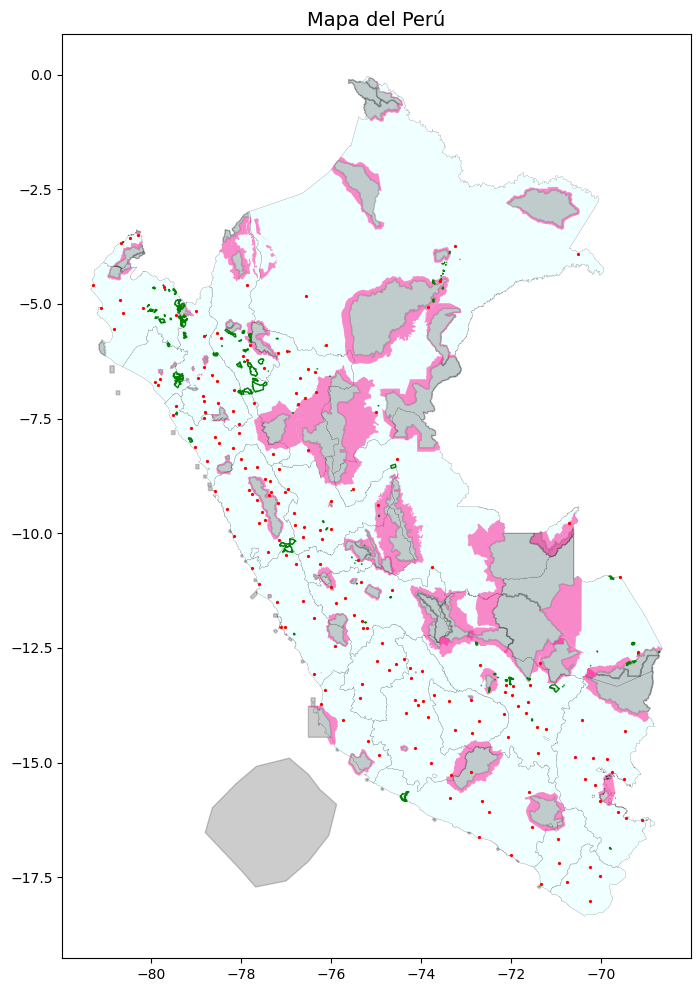

In [6]:
#cargamos la capa del archivo geopackage
capaPeru = gpd.read_file(PeruMapas)

# denominamos a nuestra imagen base como "baseMapa"
baseMapa = peru.geometry.plot(facecolor="azure", edgecolor='black', linewidth=0.1, figsize=(12,12))
areasUrbanasNacionales.plot(marker='p', color='black', markersize=3, edgecolor='black', linewidth=1, alpha=0.2, ax=baseMapa)
zonaAmortiguamiento.plot(marker='x', color='deeppink', markersize=7, alpha=0.5, ax=baseMapa)
areasUrbanasPrivadas.plot(marker='p', color='none', markersize=2, edgecolor='green', linewidth=1, alpha=1, ax=baseMapa)
ciudades.plot(marker='.', color='red', markersize=7, alpha=1, ax=baseMapa)

# agregamos título y leyenda a nuestro mapa del país: "Peru"
baseMapa.set_title("Mapa del Perú", fontsize=14)

In [7]:
#unidades tienen que estae en grados:
peru.crs.axis_info

[Axis(name=Geodetic latitude, abbrev=Lat, direction=north, unit_auth_code=EPSG, unit_code=9122, unit_name=degree),
 Axis(name=Geodetic longitude, abbrev=Lon, direction=east, unit_auth_code=EPSG, unit_code=9122, unit_name=degree)]

In [8]:
#vemos el centroide de nuestro país elegido
peru.centroid

C:\Users\thiag\AppData\Local\Temp\ipykernel_5588\3600681548.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  peru.centroid


0      POINT (-78.05489 -5.07073)
1      POINT (-77.66997 -9.40702)
2     POINT (-72.97538 -14.02814)
3     POINT (-72.47623 -15.84292)
4     POINT (-74.08367 -14.08861)
5      POINT (-78.74544 -6.43300)
6     POINT (-77.12585 -11.94033)
7     POINT (-72.16934 -13.18788)
8     POINT (-75.00278 -13.02439)
9      POINT (-76.02561 -9.41620)
10    POINT (-75.57358 -14.23430)
11    POINT (-74.87907 -11.53821)
12     POINT (-78.36834 -7.92141)
13     POINT (-79.82689 -6.34056)
14    POINT (-76.62717 -11.78557)
15     POINT (-74.42636 -4.11981)
16    POINT (-70.53469 -11.98086)
17    POINT (-70.83842 -16.85983)
18    POINT (-75.29991 -10.39887)
19     POINT (-80.33598 -5.12800)
20    POINT (-69.95071 -14.92911)
21     POINT (-76.71503 -7.03417)
22    POINT (-70.27696 -17.64472)
23     POINT (-80.54458 -3.85635)
24     POINT (-73.43336 -9.61992)
dtype: geometry

In [9]:
#obtenemos el centroide del país
centroidePeru = peru.geometry.unary_union.centroid

#imprimimos las coordenadas del centroide del país
print(centroidePeru.x, centroidePeru.y)

-74.37649230842716 -9.142959101274242


In [10]:
#vemos que la projeccion "3587" tiene como unidad al "metro"
peru.to_crs(3587).crs.axis_info

[Axis(name=Easting, abbrev=X, direction=east, unit_auth_code=EPSG, unit_code=9001, unit_name=metre),
 Axis(name=Northing, abbrev=Y, direction=north, unit_auth_code=EPSG, unit_code=9001, unit_name=metre)]

In [11]:
#proyectamos las geometrías en la proyección EPSG 3587
peruProyectado3587 = peru.to_crs(3587)

#obtenemos el centroide del país proyectado
centroidePeruProyectado3587 = peruProyectado3587.geometry.unary_union.centroid

#imprimimos las coordenadas del centroide del país proyectado
print(centroidePeruProyectado3587.x, centroidePeruProyectado3587.y)

7687308.42785374 -6711127.303405803


<Axes: >

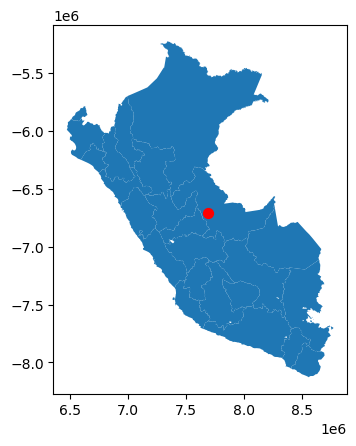

In [12]:
# ploteamos esta versión proyectada
basePeru3587 = peru.to_crs(3587).plot()
gpd.GeoSeries([centroidePeruProyectado3587]).plot(color='red', ax=basePeru3587, markersize=50)

In [13]:
#buscamos una proyeccion mucho más precisa, en el caso del peru, la mejor proyeccion es la "24891"

# recomendado para peru (metros)
peru.to_crs(24891).crs.axis_info

[Axis(name=Easting, abbrev=X, direction=east, unit_auth_code=EPSG, unit_code=9001, unit_name=metre),
 Axis(name=Northing, abbrev=Y, direction=north, unit_auth_code=EPSG, unit_code=9001, unit_name=metre)]

In [14]:
#proyectamos las geometrías en la proyección EPSG 24891
peruProyectado24891 = peru.to_crs(24891)

#obtenemos el centroide del país proyectado
centroidePeruProyectado24891 = peruProyectado24891.geometry.unary_union.centroid

#imprimimos las coordenadas del centroide del país proyectado
print(centroidePeruProyectado24891.x, centroidePeruProyectado24891.y)

893954.1561091122 1075368.18237618


<Axes: >

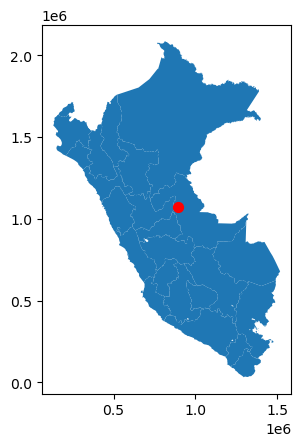

In [15]:
# ploteamos esta versión proyectada, la que es "mejor"
basePeru24891 = peru.to_crs(24891).plot()
gpd.GeoSeries([centroidePeruProyectado24891]).plot(color='red', ax=basePeru24891, markersize=50)

<Axes: title={'center': 'unprojected'}>

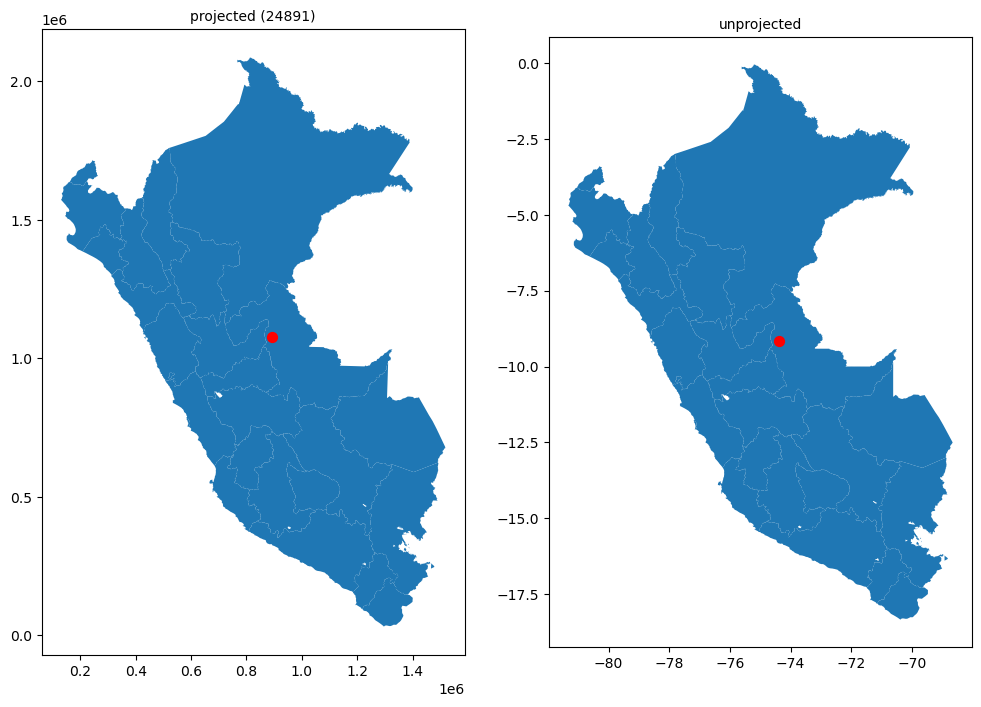

In [16]:
from matplotlib import pyplot

fig, (ax1, ax2) = pyplot.subplots(ncols=2, sharex=False, sharey=False, figsize=(12,12))

ax1.set_title('projected (24891)',fontsize=10)
peru.to_crs(24891).plot(ax=ax1)
gpd.GeoSeries([centroidePeruProyectado24891]).plot(color='red', ax=ax1, markersize=50)

ax2.set_title('unprojected',fontsize=10)
peru.plot(ax=ax2)
gpd.GeoSeries([centroidePeru]).plot(color='red', ax=ax2, markersize=50)

In [17]:
#mantenemos la versión proyectada para todos nuestros mapas (con los listlayers)

#solo peru
peru_24891 = peru.to_crs(24891)

In [18]:
#guardamos el nuevo mapa de peru proyectado

import os

peru_24891.to_file(os.path.join("mapas","peruMapa24891_.gpkg"), driver="GPKG")

In [19]:
#EJERCICIO 2: